In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
class PulsesChain():
    
    def __init__(self):
        pass

In [128]:
class Pulse():

    type_list = ['sine', 'trapezoid', 'triangle', 'rectangular']

    def __init__(self):
        pass

    def draw_line(self, y_1: float, y_2: float, x_dots: list) -> list:
        x_1, x_2 = x_dots[0], x_dots[-1]
        y_dots = [(y_2 - y_1) / (x_2 - x_1) * (x - x_1)  + y_1 for x in x_dots] 
        return y_dots

    def sine(self):
        pass

    def trapezoid(self, amplitude: float, rise_time: float, waite_time: float, down_time: float, period_time: float = None) -> np.array:
        #if rise_time + waite_time + down_time > period_time:
            #raise ValueError(f'the sum rise_time + waite_time + down_time bigger then period_time')


        if period_time == None:
            full_time = rise_time + waite_time + down_time
            if rise_time == 0:
                rise_time = full_time/self.dots_per_pulse
            if waite_time == 0:
                waite_time = full_time/self.dots_per_pulse
            if down_time == 0:
                down_time = full_time/self.dots_per_pulse
            if period_time == 0:
                period_time = full_time/self.dots_per_pulse
            
            x_array = np.linspace(0, full_time, self.dots_per_pulse)

            rise_x_dots = int(self.dots_per_pulse * rise_time / full_time)
            waite_x_dots = int(self.dots_per_pulse * waite_time / full_time)

            rise_x_slice = x_array[0: rise_x_dots]
            waite_x_slice = x_array[rise_x_dots: rise_x_dots + waite_x_dots+1]
            down_x_slice = x_array[rise_x_dots + waite_x_dots: -1]
            #if len(rise_x_slice + waite_x_slice + down_x_slice) != self.dots_per_pulse:


            rise_y_slice = self.draw_line(0, amplitude, rise_x_slice)
            waite_y_slice = self.draw_line(amplitude, amplitude, waite_x_slice)
            down_y_slice = self.draw_line(amplitude, 0, down_x_slice)

            y_array = np.concatenate([rise_y_slice, waite_y_slice, down_y_slice])

        else:
            full_time = rise_time + waite_time + down_time + period_time
            if rise_time == 0:
                rise_time = full_time/self.dots_per_pulse
            if waite_time == 0:
                waite_time = full_time/self.dots_per_pulse
            if down_time == 0:
                down_time = full_time/self.dots_per_pulse
            if period_time == 0:
                period_time = full_time/self.dots_per_pulse
            
            x_array = np.linspace(0, full_time, self.dots_per_pulse)

            rise_x_dots = int(self.dots_per_pulse * rise_time / full_time)
            waite_x_dots = int(self.dots_per_pulse * waite_time / full_time)
            down_x_dots = int(self.dots_per_pulse * down_time / full_time)

            rise_x_slice = x_array[0: rise_x_dots]
            waite_x_slice = x_array[rise_x_dots: rise_x_dots + waite_x_dots + 1]
            down_x_slice = x_array[rise_x_dots + waite_x_dots: rise_x_dots + waite_x_dots + down_x_dots]
            zero_x_slice = x_array[rise_x_dots + waite_x_dots + down_x_dots: -1]

            rise_y_slice = self.draw_line(0, amplitude, rise_x_slice)
            waite_y_slice = self.draw_line(amplitude, amplitude, waite_x_slice)
            down_y_slice = self.draw_line(amplitude, 0, down_x_slice)
            zero_y_slice = self.draw_line(0, 0, zero_x_slice)

            y_array = np.concatenate([rise_y_slice, waite_y_slice, down_y_slice, zero_y_slice])

        return  x_array ,y_array


    def triangle(self):
        pass

    def rectangular(self):
        pass

    def set_type(self, pulse_type: str, dots_per_pulse: int) -> None:
        #if isinstance(dots_per_pulse, int):
        #    raise ValueError('dots_per_pulse must have int type')
        if str(pulse_type) not in self.type_list:
            raise ValueError(f'{pulse_type} not exist in type_list')
        else:
            self.pulse_type = str(pulse_type)
            self.dots_per_pulse = dots_per_pulse

    

C:\Users\Nikita\AppData\Local\Temp\ipykernel_24284\2840336950.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  y_dots = [(y_2 - y_1) / (x_2 - x_1) * (x - x_1)  + y_1 for x in x_dots]
C:\Users\Nikita\AppData\Local\Temp\ipykernel_24284\2840336950.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  y_dots = [(y_2 - y_1) / (x_2 - x_1) * (x - x_1)  + y_1 for x in x_dots]


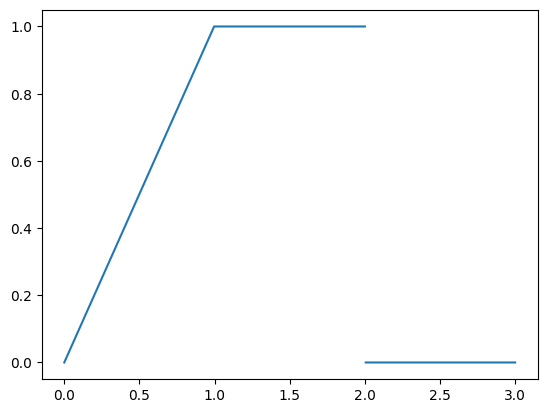

In [129]:
p_1 = Pulse()
p_1.set_type('sine', dots_per_pulse = 1000)
x, y = p_1.trapezoid(1, 1,1,0, 1)
plt.plot(x, y)